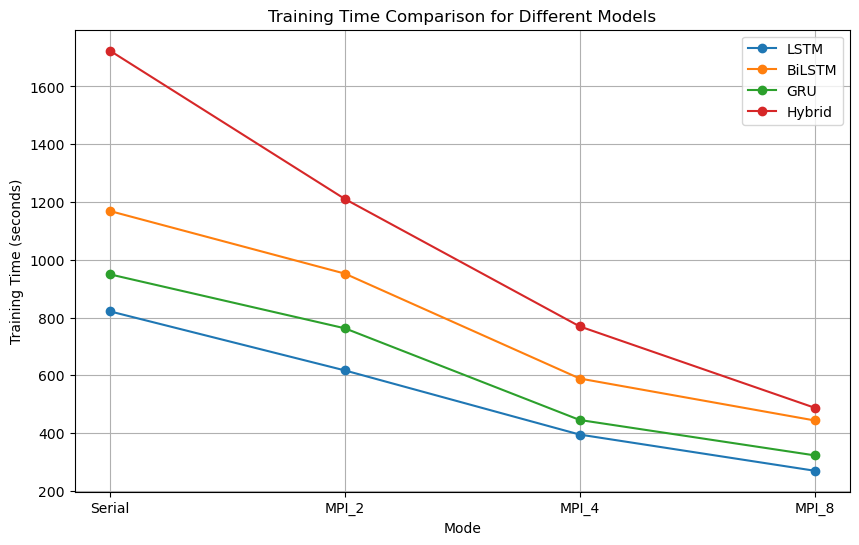

In [2]:
import matplotlib.pyplot as plt
import re

def parse_times(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    times = {'BiLSTM': {}, 'GRU': {}, 'Hybrid': {}, 'LSTM': {}}
    
    for line in lines:
        match = re.match(r'(MPI_\d+|Serial)_(\w+)\.out:Training Time: ([\d\.]+) seconds', line)
        if match:
            mode, model, time = match.groups()
            times[model][mode] = float(time)
    
    return times

def plot_training_times(times):
    models = ['LSTM', 'BiLSTM', 'GRU', 'Hybrid']
    modes = ['Serial', 'MPI_2', 'MPI_4', 'MPI_8']
    
    plt.figure(figsize=(10, 6))
    
    for model in models:
        training_times = [times[model].get(mode, None) for mode in modes]
        plt.plot(modes, training_times, marker='o', label=model)
    
    plt.xlabel('Mode')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison for Different Models')
    plt.legend()
    plt.grid(True)
    plt.savefig("TimePlot10yrs.png")
    plt.show()

def main():
    filename = 'FinalTimes.txt'
    times = parse_times(filename)
    plot_training_times(times)

if __name__ == "__main__":
    main()


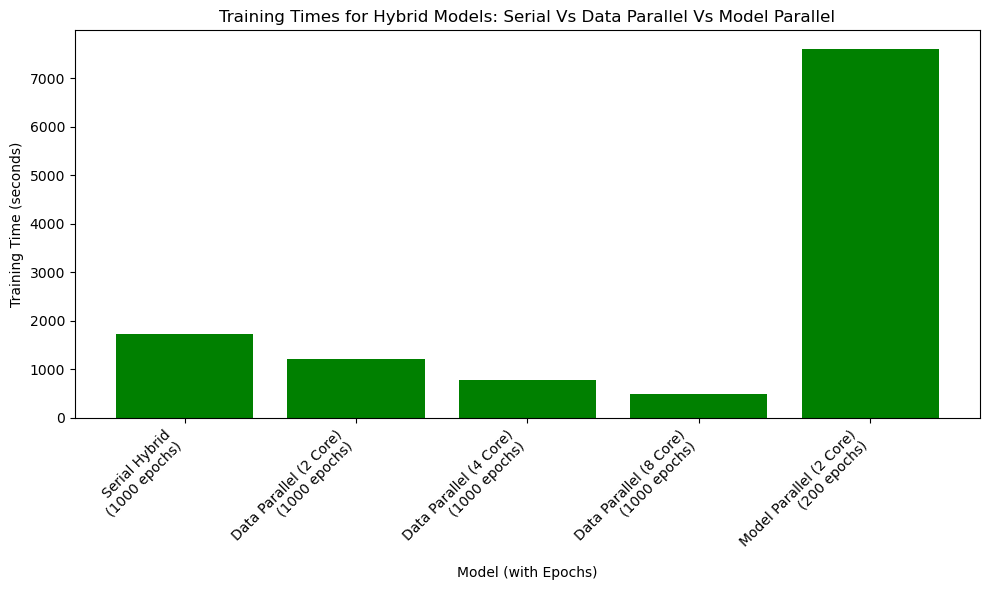

In [3]:
import matplotlib.pyplot as plt

# Load the data from the file
data = {}
with open("FinalTimesHybrids.txt", "r") as file:
    for line in file:
        key, value = line.split(":", 1)  # Split by the first colon only
        key = key.strip().split(".")[0]  # Strip whitespace to avoid issues with keys
        value = value.strip().replace("Training Time: ", "").replace(" seconds", "").strip()
        data[key] = float(value)

# Define the model order and epochs information
ordered_models = [
    "Serial_Hybrid",
    "MPI_2_Hybrid",
    "MPI_4_Hybrid",
    "MPI_8_Hybrid",
    "MPI_2LSTM-GRULSTM"
]

label_models = [
    "Serial Hybrid",
    "Data Parallel (2 Core)",
    "Data Parallel (4 Core)",
    "Data Parallel (8 Core)",
    "Model Parallel (2 Core)"
]

epochs_info = {
    'Serial_Hybrid': '1000 epochs',
    'MPI_2_Hybrid': '1000 epochs',
    'MPI_4_Hybrid': '1000 epochs',
    'MPI_8_Hybrid': '1000 epochs',
    'MPI_2LSTM-GRULSTM': '200 epochs'
}

# Extract data in specified order
training_times = [data[model] for model in ordered_models]

# Create labels with epoch information
labels = [f"{modellbl}\n({epochs_info[model]})" for modellbl, model in zip(label_models, ordered_models)]
# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, training_times, color='green')
plt.xlabel('Model (with Epochs)')
plt.ylabel('Training Time (seconds)')
plt.title('Training Times for Hybrid Models: Serial Vs Data Parallel Vs Model Parallel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("TimePlotHybrids10yr.png")
plt.show()


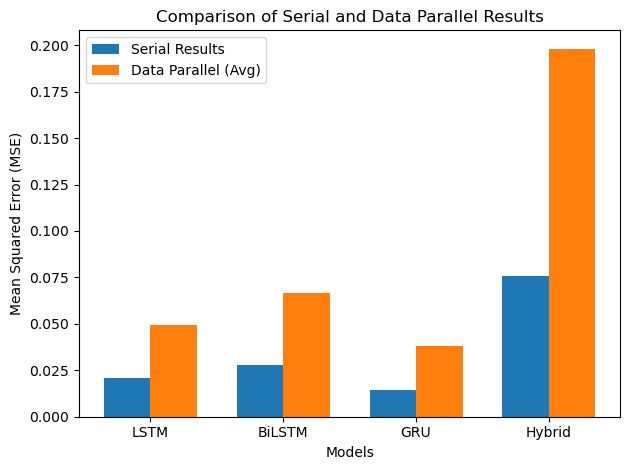

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LSTM', 'BiLSTM', 'GRU', 'Hybrid']
serial_results = [0.0209, 0.0278, 0.0146, 0.0759]
data_parallel_results = [
    [0.0463, 0.1219, 0.0038, 0.1520],  # 2 Cores
    [0.0606, 0.0735, 0.1076, 0.3110],  # 4 Cores
    [0.0416, 0.0043, 0.0026, 0.1313]   # 8 Cores
]

# Average data parallel results across cores
data_parallel_avg = np.mean(data_parallel_results, axis=0)

# Bar width and positions
bar_width = 0.35
x = np.arange(len(models))  # x positions for the bars

# Create bar chart
plt.bar(x - bar_width / 2, serial_results, bar_width, label='Serial Results')
plt.bar(x + bar_width / 2, data_parallel_avg, bar_width, label='Data Parallel (Avg)')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Serial and Data Parallel Results')
plt.xticks(x, models)  # Set model names as x-tick labels

# Add legend
plt.legend()

# Adjust layout and save plot
plt.tight_layout()
plt.savefig("serialParallelComparison.png")
plt.show()
